In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import utils

### Load Data

In [2]:
x_points= np.linspace(0,20)
y_points= -2*x_points + 1

### Data Plotting Methods

In [3]:
def drawScatter(x,y,xlabel,ylabel,title):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [4]:
def drawScatter2(x,y,xlabel,ylabel,title):
    plt.plot(x,y,'-o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [5]:
def drawRegressionLine(x,y,xlabel,ylabel,title,theta0,theta1):
    drawScatter(x,y,xlabel,ylabel,title)
    plt.plot(x, theta0 + theta1*x_points ,color='red')

### Data Plotting

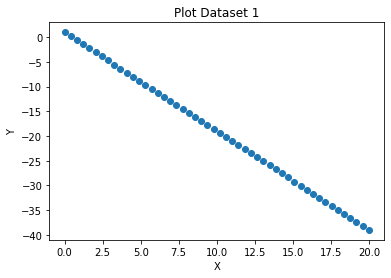

In [6]:
drawScatter(x_points,y_points,"X","Y","Plot Dataset 1")

## Adagrad

In [7]:
def adagrad (x,y,epochs,alpha,eps,threshold):
    thetas=np.array([0,0])
    v=np.array([0,0])
    thetaList , costs,hs, vs  = np.empty((1,2)),[],[],[v]
    grads = []
    X = np.hstack((np.ones((len(x), 1)), x.reshape(len(x), 1)))
    for i in range (epochs) :
        h = np.dot(thetas,X.T)
        e = h-y
        cost =  np.sum(np.dot(e,e))/(len(y)*2)
        if(len(costs)>0 and abs(costs[-1]-cost)<threshold):
            break
        costs.append(cost)
        thetaList = np.append(thetaList,[thetas],axis =0)
        hs.append(h)
        grads =  np.dot(X.T,e)/len(y)
        v = vs[-1] + np.dot(grads,grads)
        thetas = thetas - (alpha*grads)/((v+eps)**0.5)
    thetaList = np.delete(thetaList,0,0)
    return thetaList,costs,hs

In [8]:
thetas , costs , h = adagrad (x_points,y_points,500,0.05,10**-8,0.001)
print(len(costs))
print(costs[-1])
print(thetas[-1])

500
0.04954202985608194
[ 0.80174354 -2.01098037]


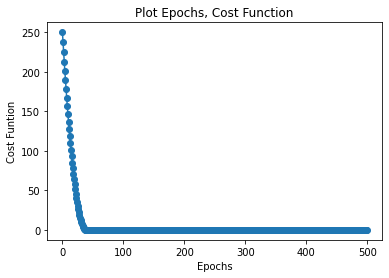

In [9]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Funtion","Plot Epochs, Cost Function")

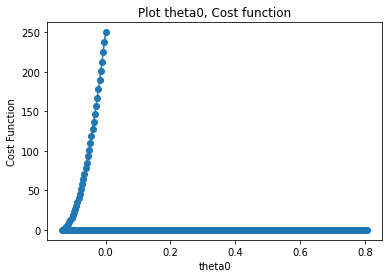

In [10]:
drawScatter2(thetas[:,0],costs,"theta0","Cost Function","Plot theta0, Cost function")

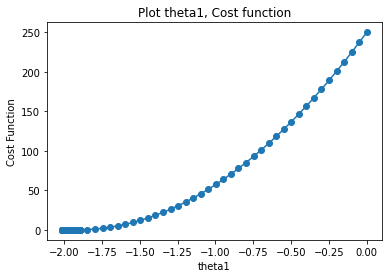

In [11]:
drawScatter2(thetas[:,1],costs,"theta1","Cost Function","Plot theta1, Cost function")

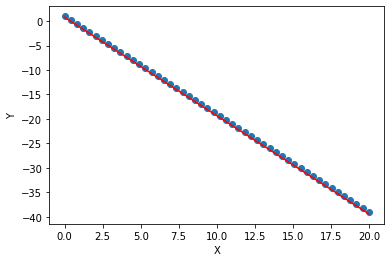

In [12]:
drawRegressionLine(x_points,y_points,"X","Y","",thetas[-1:,0],thetas[-1,1])

In [13]:
print("r2 =",r2_score(y_points, h[-1]))
print("cost =",costs[-1])

r2 = 0.9992860119226623
cost = 0.04954202985608194


## RMSProp

In [14]:
def RMSProp (x,y,epochs,alpha,eps,beta,threshold):
    thetas=np.array([0,0])
    v=np.array([0,0])
    thetaList , costs,hs, vs  = np.empty((1,2)),[],[],[v]
    grads = []
    X = np.hstack((np.ones((len(x), 1)), x.reshape(len(x), 1)))
    for i in range (epochs) :
        h = np.dot(thetas,X.T)
        e = h-y
        cost =  np.sum(np.dot(e,e))/(len(y)*2)
        if(len(costs)>0 and abs(costs[-1]-cost)<threshold):
            break
        costs.append(cost)
        thetaList = np.append(thetaList,[thetas],axis =0)
        hs.append(h)
        grads = np.dot(X.T,e)/len(y)
        v = beta * vs[-1] + (1-beta)*np.dot(grads,grads)
        thetas = thetas - (alpha*grads)/((v+eps)**0.5)
    thetaList = np.delete(thetaList,0,0)
    return thetaList,costs,hs

In [15]:
thetas , costs , h = RMSProp (x_points,y_points,2000,0.005,10**-8,0.9,0.0001)
print(len(costs))
print(costs[-1])

455
0.017429819287358574


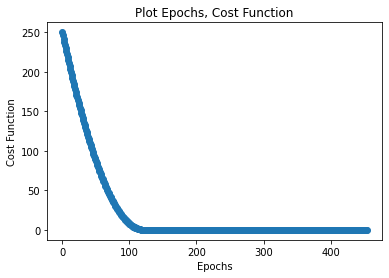

In [16]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

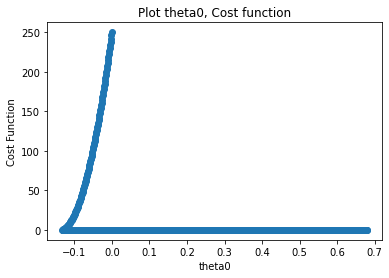

In [17]:
drawScatter2(thetas[:,0],costs,"theta0","Cost Function","Plot theta0, Cost function")

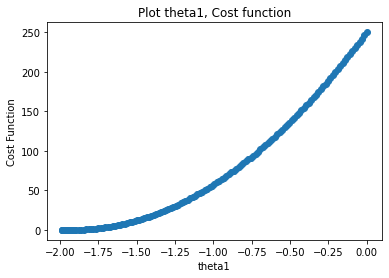

In [18]:
drawScatter2(thetas[:,1],costs,"theta1","Cost Function","Plot theta1, Cost function")

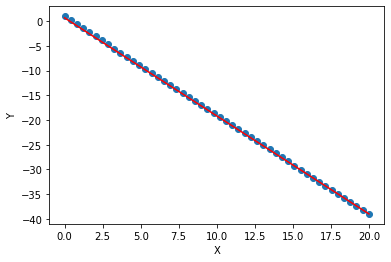

In [19]:
drawRegressionLine(x_points,y_points,"X","Y","",thetas[-1:,0],thetas[-1,1])

In [20]:
print("r2 =",r2_score(y_points, h[-1]))
print("cost =",costs[-1])

r2 = 0.9997488055455646
cost = 0.017429819287358574


## Adam

In [21]:
def Adam (x,y,epochs,alpha,eps,beta1,beta2,threshold):
    thetas=np.array([0,0])
    m=np.array([0,0])
    v=np.array([0,0])
    thetaList , costs,hs, vs, ms  = np.empty((1,2)),[],[],[v],[m]
    grads = []
    X = np.hstack((np.ones((len(x), 1)), x.reshape(len(x), 1)))
    for i in range (epochs) :
        h = np.dot(thetas,X.T)
        e = h-y
        cost = np.sum(np.dot(e,e))/(len(y)*2)
        if(len(costs)>0 and abs(costs[-1]-cost)<threshold):
            break
        costs.append(cost)
        thetaList = np.append(thetaList,[thetas],axis =0)
        hs.append(h)
        grads = np.dot(X.T,e)/len(y)
        m = beta1 * ms[-1] + (1-beta1)*grads
        v = beta2 * vs[-1] + (1-beta2)*np.dot(grads,grads)
        thetas = thetas - (alpha*(m/(1-beta1**(i+1))))/(((v/(1-beta2**(i+1)))+eps)**0.5)
    thetaList = np.delete(thetaList,0,0)
    return thetaList,costs,hs

In [22]:
thetas , costs , h = Adam (x_points,y_points,2000,0.01,10**-8,0.9,0.999,0.0001)
print(len(costs))

522


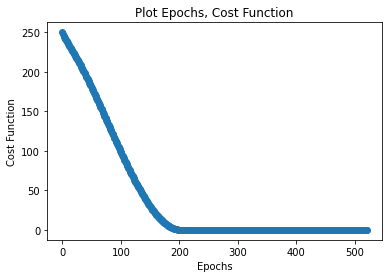

In [23]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

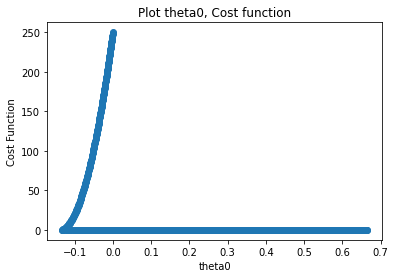

In [24]:
drawScatter2(thetas[:,0],costs,"theta0","Cost Function","Plot theta0, Cost function")

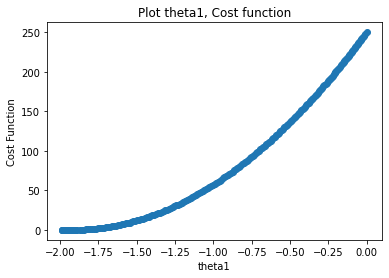

In [25]:
drawScatter2(thetas[:,1],costs,"theta1","Cost Function","Plot theta1, Cost function")

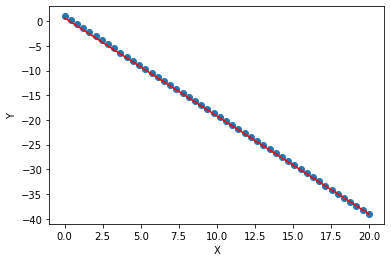

In [26]:
drawRegressionLine(x_points,y_points,"X","Y","",thetas[-1:,0],thetas[-1,1])

In [27]:
print("r2 =",r2_score(y_points, h[-1]))
print("cost =",costs[-1])

r2 = 0.9996920517188083
cost = 0.02136783991942325
